## Santander Product Recommendation

### Team: Lisa Barcelo, Ankith Gunapal & Prajakta Pandharkar


### Please install seaborn using "pip install seaborn" if not already installed . We used this to make the graphs looks better. Code works fine even if you comment out the import seaborn statement

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import datetime

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction import DictVectorizer

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *


#Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 


import matplotlib.pyplot as plt
import seaborn

import warnings
warnings.filterwarnings('ignore')

import seaborn

## The goal is to predict the products a user will buy in June 2016 based on previous years data. 
## The first idea so far is to train the model with data from June of previous years and then predict what products will be bought in June 2016. The dataset requires a lot of cleaning. We try with various classifiers with one class. 

## We run this on all the classes and average the accuracy. From what we looked up, we cannnot use Logistic Regression on a multiclass case. Instead, we need to try kNN or Random Forest.

In [2]:
import pandas as pd

f = pd.read_csv("train_ver2.csv", nrows=100000)

(Once we ran the classifier and the accuracy was high, we didn't think it was necessary to read in more data)

In [3]:
f.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


### A peek at the various columns in the data frame
(Columns 24 and beyond are binary representations of whether or not the products were purchased)

In [4]:
f.columns

Index([u'fecha_dato', u'ncodpers', u'ind_empleado', u'pais_residencia',
       u'sexo', u'age', u'fecha_alta', u'ind_nuevo', u'antiguedad', u'indrel',
       u'ult_fec_cli_1t', u'indrel_1mes', u'tiprel_1mes', u'indresi',
       u'indext', u'conyuemp', u'canal_entrada', u'indfall', u'tipodom',
       u'cod_prov', u'nomprov', u'ind_actividad_cliente', u'renta',
       u'segmento', u'ind_ahor_fin_ult1', u'ind_aval_fin_ult1',
       u'ind_cco_fin_ult1', u'ind_cder_fin_ult1', u'ind_cno_fin_ult1',
       u'ind_ctju_fin_ult1', u'ind_ctma_fin_ult1', u'ind_ctop_fin_ult1',
       u'ind_ctpp_fin_ult1', u'ind_deco_fin_ult1', u'ind_deme_fin_ult1',
       u'ind_dela_fin_ult1', u'ind_ecue_fin_ult1', u'ind_fond_fin_ult1',
       u'ind_hip_fin_ult1', u'ind_plan_fin_ult1', u'ind_pres_fin_ult1',
       u'ind_reca_fin_ult1', u'ind_tjcr_fin_ult1', u'ind_valo_fin_ult1',
       u'ind_viv_fin_ult1', u'ind_nomina_ult1', u'ind_nom_pens_ult1',
       u'ind_recibo_ult1'],
      dtype='object')

### Feature Engineering

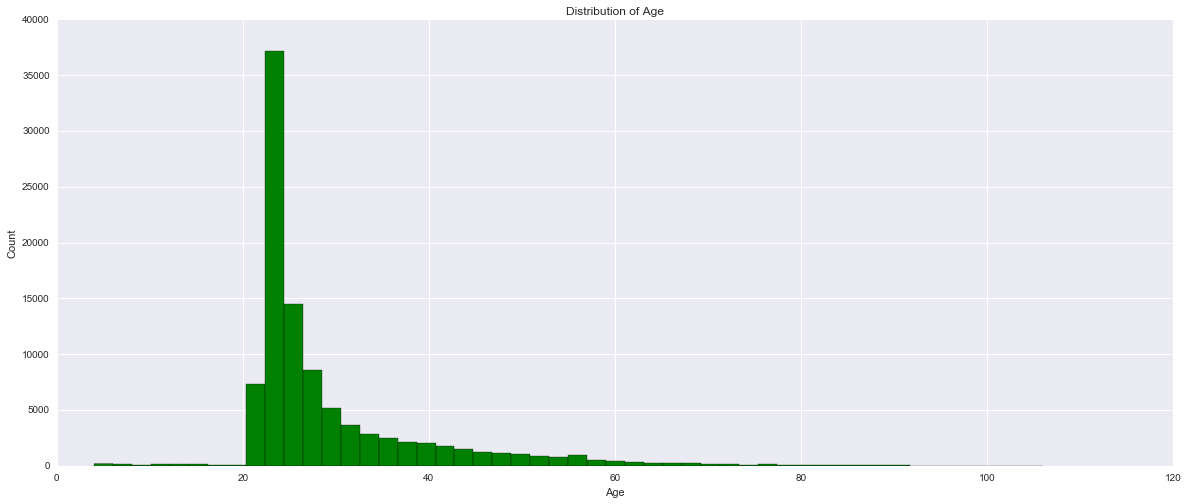

In [5]:
#Age was initially set as a string, whereas we needed it to be a number, so we modified it
f["age"]   = pd.to_numeric(f["age"], errors="coerce")
ax = plt.figure(figsize=(20,8))
n,bins,patches = plt.hist(f["age"].dropna(), 50, facecolor='green')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")

### We see that there are very few customers who are below the age of 20 and above age 90. Hence, we can transform the ages of these customers to be in the valid region for the model to perform better

In [6]:
f.loc[f.age < 18,"age"]  = f.loc[(f.age >= 18) & (f.age <= 30),"age"].mean(skipna=True)
f.loc[f.age > 90,"age"] = f.loc[(f.age >= 30) & (f.age <= 90),"age"].mean(skipna=True)
f["age"].fillna(f["age"].mean(),inplace=True)
f["age"]                  = f["age"].astype(int)

### Transformed Age

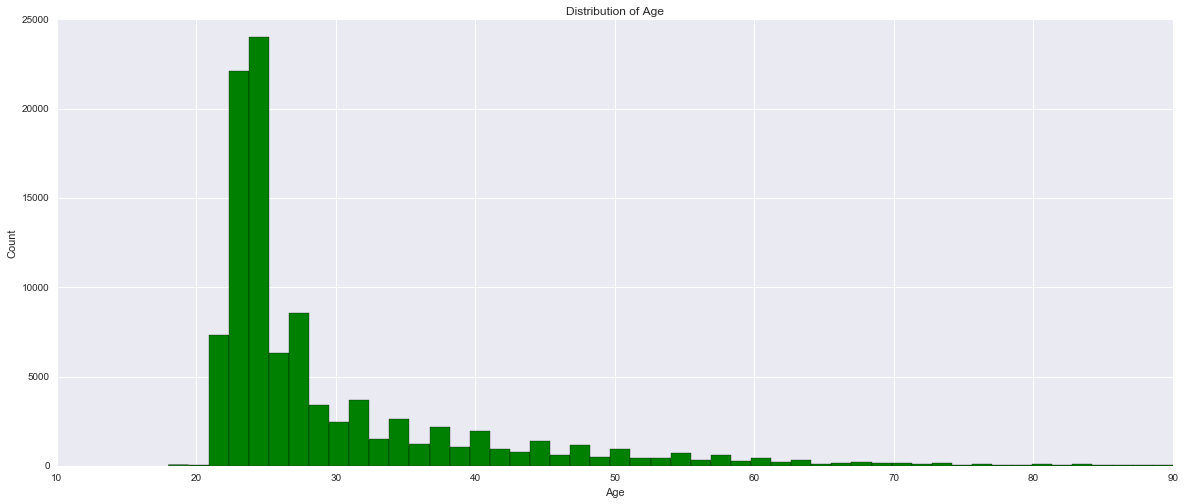

In [7]:
f["age"]   = pd.to_numeric(f["age"], errors="coerce")
ax = plt.figure(figsize=(20,8))
n,bins,patches = plt.hist(f["age"].dropna(), 50, facecolor='green')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")


In [8]:
#We want to see which columns held null values so we could zone in 
f.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

## renta (income) is likely to be an important feature.  Hence, we need to rectify the data if renta has many missing values.

In [9]:
f.renta.isnull().sum()

18284

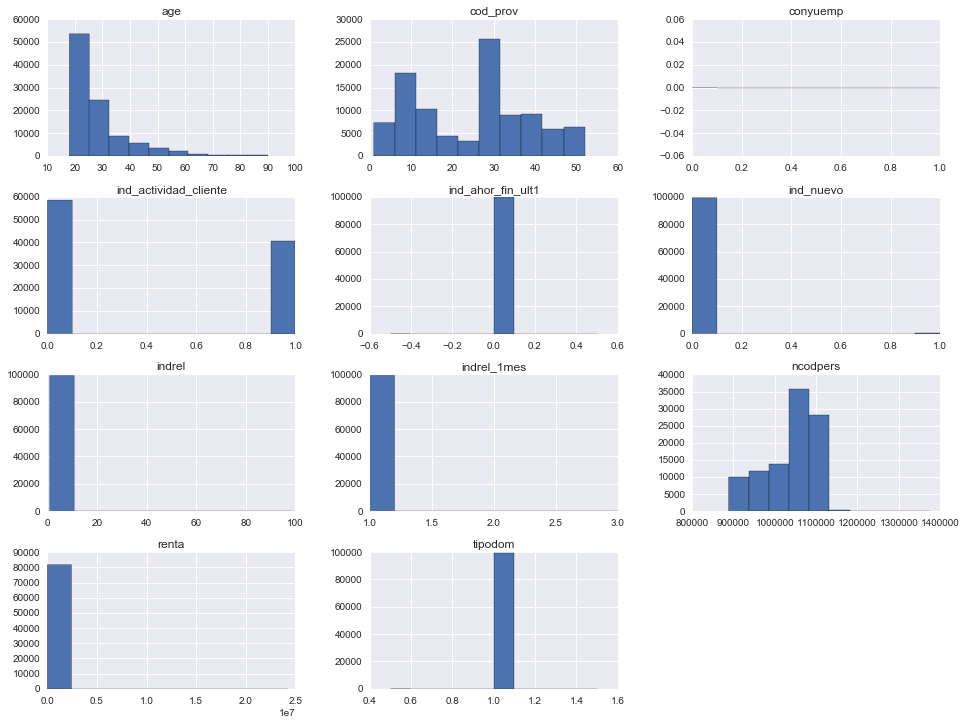

In [10]:
#plotting features for analysis
f.ix[:,0:25].hist(figsize=(16,12))
plt.show()

### A lot of renta entries are missing. We could try replacing NA with the median of renta

In [11]:
print f.renta.median()

89610.21


In [12]:
f.loc[f.renta.isnull(), "renta"] = f.renta.median()

In [13]:
f.renta.isnull().sum()

0

### Total Number of entries for the month of June from 2009 to 2016 for train and test

In [14]:
train_data_ct = pd.read_csv("train_ver2.csv", usecols=['ncodpers'])
test_data_ct = pd.read_csv("test_ver2.csv", usecols=['ncodpers'])
print("Number of rows in train : ", train_data_ct.shape[0])
print("Number of rows in test : ", test_data_ct.shape[0])

train_unique_cust_nbr = set(train_data_ct.ncodpers.unique())
test_unique_cust_nbr = set(test_data_ct.ncodpers.unique())
print("Number of customers in train : ", len(train_unique_cust_nbr))
print("Number of customers in test : ", len(test_unique_cust_nbr))
print("Number of common customers : ", len(train_unique_cust_nbr.intersection(test_unique_cust_nbr)))

('Number of rows in train : ', 13647309)
('Number of rows in test : ', 929615)
('Number of customers in train : ', 956645)
('Number of customers in test : ', 929615)
('Number of common customers : ', 929615)


### Fetch entries for the month of June 2009 through 2014 as well as 2015 and 2016 in its entirety

In [15]:
g = f[(f['fecha_dato'] >= '2014-06-01') & (f['fecha_dato'] <= '2014-06-30') | 
      (f['fecha_dato'] >= '2013-06-01') & (f['fecha_dato'] <= '2013-06-30') |
      (f['fecha_dato'] >= '2012-06-01') & (f['fecha_dato'] <= '2012-06-30') |
      (f['fecha_dato'] >= '2011-06-01') & (f['fecha_dato'] <= '2011-06-30') |
      (f['fecha_dato'] >= '2010-06-01') & (f['fecha_dato'] <= '2010-06-30') |
      (f['fecha_dato'] >= '2009-06-01') & (f['fecha_dato'] <= '2009-06-30') |
      (f['fecha_dato'] >= '2015-01-01') & (f['fecha_dato'] <= '2015-12-31') |
      (f['fecha_dato'] >= '2016-01-01') & (f['fecha_dato'] <= '2016-05-31')
     ]

### The various products to be predicted are from column 25. So, the task is to predict yes or no for 23 products

In [16]:
labels = g[g.columns[25:]]
type(labels)

pandas.core.frame.DataFrame

## canal_entrada, cod_prov, nomprov, and segmento contain NaN values. 
## filter all the rows containing NaN. 
## Including canal_entrada is causing issues. The Model throws an error. Not sure what the outlier is

In [17]:
g_no_nan = g[~g['segmento'].isnull().values & ~g['renta'].isnull().values  & 
             ~g['cod_prov'].isnull().values & ~g['nomprov'].isnull().values]
labels_no_nan = labels[~g['segmento'].isnull().values & ~g['renta'].isnull().values & 
                       ~g['cod_prov'].isnull().values & ~g['nomprov'].isnull().values]

In [18]:
data = g_no_nan[['ind_empleado','ncodpers','age','sexo','ind_nuevo','antiguedad','indrel','indrel_1mes',
         'tiprel_1mes','indresi','indext','indfall','ind_actividad_cliente','cod_prov','nomprov','renta','segmento']]
type(data)

pandas.core.frame.DataFrame

In [19]:
data.head()

,ind_empleado,ncodpers,age,sexo,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,indfall,ind_actividad_cliente,cod_prov,nomprov,renta,segmento
0,N,1375586,35,H,0.0,6,1.0,1.0,A,S,N,N,1.0,29.0,MALAGA,87218.10,02 - PARTICULARES
1,N,1050611,23,V,0.0,35,1.0,1.0,I,S,S,N,0.0,13.0,CIUDAD REAL,35548.74,03 - UNIVERSITARIO
2,N,1050612,23,V,0.0,35,1.0,1.0,I,S,N,N,0.0,13.0,CIUDAD REAL,122179.11,03 - UNIVERSITARIO
3,N,1050613,22,H,0.0,35,1.0,1.0,I,S,N,N,0.0,50.0,ZARAGOZA,119775.54,03 - UNIVERSITARIO
4,N,1050614,23,V,0.0,35,1.0,1.0,A,S,N,N,1.0,50.0,ZARAGOZA,89610.21,03 - UNIVERSITARIO


In [20]:
#Convert to numpy array
data = data.as_matrix()
labels = labels_no_nan.as_matrix()

### Since many of the features are categorical variables, we had to use a Vectorizer to convert the features to a matrix which the Classifiers understand

We did some research and found that DictVectorizer was the most suggested one: http://stackoverflow.com/questions/15021521/how-to-encode-a-categorical-variable-in-sklearn

In [21]:
dv = DictVectorizer(sparse=False) 
df = pd.DataFrame(data).convert_objects(convert_numeric=True)
data = dv.fit_transform(df.to_dict(orient='records'))

In [22]:
labels = labels[~np.isnan(labels[:,20]) & ~np.isnan(labels[:,21])]
data = data[~np.isnan(labels[:,20]) & ~np.isnan(labels[:,21])]

In [23]:
train_data = data[:8000,]
dev_data = data[8000:,]
train_labels = labels[:8000,]
dev_labels = labels[8000:,]

## Running models...

In [24]:
accuracy = 0
count = 0
i_s = []
acc = []
for i in range(train_labels.shape[1]):
    train_labels[:,i] = np.nan_to_num(train_labels[:,i])
    if np.sum(train_labels[:,i] != 0.0):
        count += 1
        clf = LogisticRegression()
        clf.fit(train_data,train_labels[:,i])
        accuracy += clf.score(dev_data, dev_labels[:,i])
        i_s.append(i)
        acc.append(clf.score(dev_data, dev_labels[:,i]))
        #print 'sklearn accuracy for i = %d with Logistic regression: %3.2f' %(i,clf.score(dev_data, dev_labels[:,i]))
print "Accuracy is %3.2f" %(accuracy/count)

Accuracy is 0.97


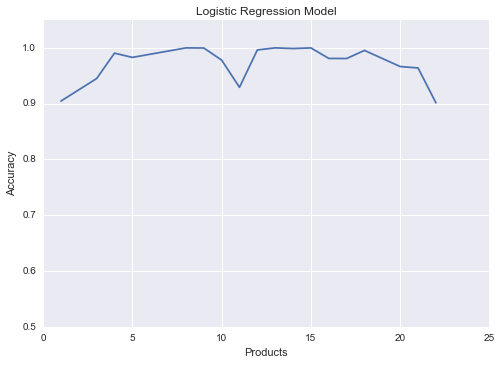

In [25]:
plt.plot(i_s,acc)
plt.title('Logistic Regression Model')
plt.xlabel('Products')
plt.ylabel('Accuracy')
plt.axis([0, 25, 0.5, 1.05])
plt.show()

In [26]:
accuracy = 0
count = 0
i_s = []
acc = []
for i in range(train_labels.shape[1]):
    train_labels[:,i] = np.nan_to_num(train_labels[:,i])
    if np.sum(train_labels[:,i] != 0.0):
        count += 1
        clf = KNeighborsClassifier(n_neighbors=3)
        clf.fit(train_data,train_labels[:,i])
        accuracy += clf.score(dev_data, dev_labels[:,i])
        i_s.append(i)
        acc.append(clf.score(dev_data, dev_labels[:,i]))
        #print 'sklearn accuracy for i = %d with kNN: %3.2f' %(i,clf.score(dev_data, dev_labels[:,i]))
print "Accuracy is %3.2f" %(accuracy/count)        

Accuracy is 0.97


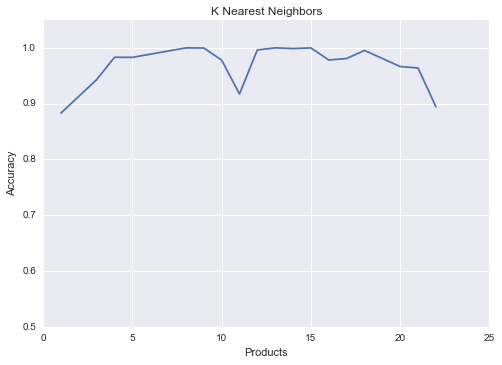

In [27]:
plt.plot(i_s,acc)
plt.title('K Nearest Neighbors')
plt.xlabel('Products')
plt.ylabel('Accuracy')
plt.axis([0, 25, 0.5, 1.05])
plt.show()

In [28]:
accuracy = 0
count = 0
i_s = []
acc = []

for i in range(train_labels.shape[1]):
    train_labels[:,i] = np.nan_to_num(train_labels[:,i])
    if np.sum(train_labels[:,i] != 0.0):
        count += 1
        clf = BernoulliNB()
        clf.fit(train_data,train_labels[:,i])
        accuracy += clf.score(dev_data, dev_labels[:,i])
        i_s.append(i)
        acc.append(clf.score(dev_data, dev_labels[:,i]))
        #print 'sklearn accuracy for i = %d with BernoulliNB: %3.2f' %(i,clf.score(dev_data, dev_labels[:,i]))
print "Accuracy is %3.2f" %(accuracy/count)        

Accuracy is 0.91


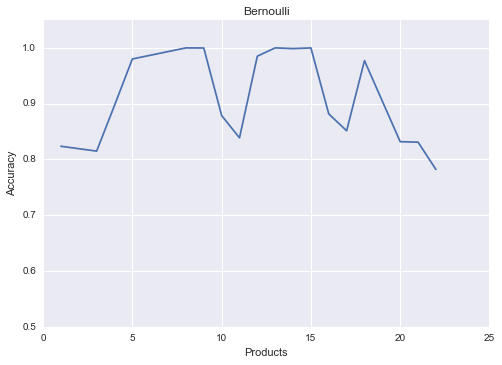

In [29]:
plt.plot(i_s,acc)
plt.title('Bernoulli')
plt.ylabel('Accuracy')
plt.xlabel('Products')
plt.axis([0, 25, 0.5, 1.05])
plt.show()

In [30]:
accuracy = 0
count = 0
i_s = []
acc = []

for i in range(train_labels.shape[1]):
    train_labels[:,i] = np.nan_to_num(train_labels[:,i])
    if np.sum(train_labels[:,i] != 0.0):
        count += 1
        clf = MultinomialNB()
        clf.fit(train_data,train_labels[:,i])
        accuracy += clf.score(dev_data, dev_labels[:,i])
        i_s.append(i)
        acc.append(clf.score(dev_data, dev_labels[:,i]))
        #print 'sklearn accuracy for i = %d with MultinomialNB: %3.2f' %(i,clf.score(dev_data, dev_labels[:,i]))
print "Accuracy is %3.2f" %(accuracy/count)        

Accuracy is 0.70


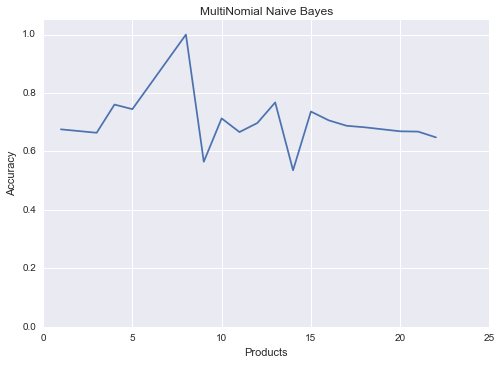

In [31]:
plt.plot(i_s,acc)
plt.title('MultiNomial Naive Bayes')
plt.ylabel('Accuracy')
plt.xlabel('Products')
plt.axis([0, 25, 0, 1.05])
plt.show()

## Experimenting with random forest

In [32]:
#ensemble methods
dt = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=0)
dt.fit(train_data, train_labels)

print 'Accuracy (a decision tree):', dt.score(dev_data, dev_labels)

acc = []
i_s = []
for nn in [1,5,10,25,50]:
    rfc = RandomForestClassifier(n_estimators=nn)
    rfc.fit(train_data, train_labels)
    i_s.append(nn)
    acc.append(rfc.score(dev_data, dev_labels))

    print 'Accuracy (a random forest) for', nn, "estimators: ", "%.3f" % rfc.score(dev_data, dev_labels)    

Accuracy (a decision tree): 0.479686026881
Accuracy (a random forest) for 1 estimators:  0.647
Accuracy (a random forest) for 5 estimators:  0.722
Accuracy (a random forest) for 10 estimators:  0.740
Accuracy (a random forest) for 25 estimators:  0.750
Accuracy (a random forest) for 50 estimators:  0.752


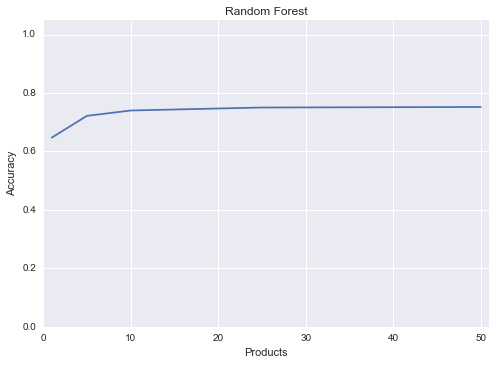

In [33]:
plt.plot(i_s,acc)
plt.title('Random Forest')
plt.ylabel('Accuracy')
plt.xlabel('Products')
plt.axis([0, 51, 0, 1.05])
plt.show()

## Analysis of the various Classifiers.

### NaiveBayes perfoms a bit poorly compared to Logistic Regression & NearestNeighbors because of the assumption of independence of features. For example: Age & Income are not independent. People between the age of 20 & 40 seem to have higher income.
### We also observe that running the Classifiers per class gives better accuracy than running Classifiers on all classes in one shot.

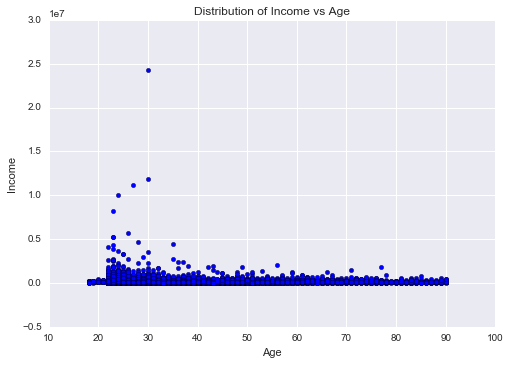

In [34]:
plt.scatter(f["age"],f["renta"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Distribution of Income vs Age")

### Random Forests did not perform quite as well.
### Upon closer inspection we noticed that it might selecting features based on data quality (i.e., columns with less "null" features)

#### In fact, we can see that the columns that needed a lot of cleaning show up on the right hand side of our sorted graph

Model: Random Forest

25 Important features for random forest are

['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo', 'agefecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento']


(0, 25)

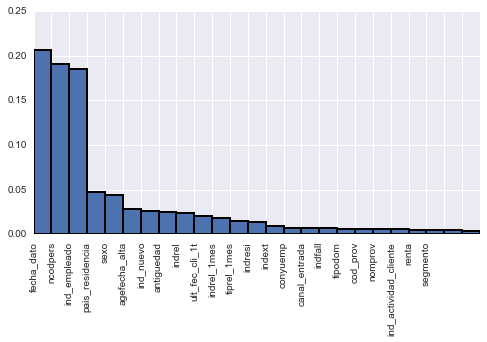

In [35]:
#See what random forest has used as important features 

featuresind=[]
plt.figure(figsize=(8, 4))
featuresind = np.argsort(rfc.feature_importances_)[::-1]
imp_features = rfc.feature_importances_[featuresind][:25]
feature_names = ['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo' ,'age'
     'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t',
     'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada',
     'indfall', 'tipodom' ,'cod_prov' ,'nomprov', 'ind_actividad_cliente', 'renta',
     'segmento']
feature_names_array=np.array(feature_names)
    
print "Model: Random Forest\n"
print "%d Important features for random forest are\n" % 25
print feature_names

#Bar char of important features 
plt.bar(np.arange(len(imp_features)), imp_features, width=1, lw=2)
xlabels=feature_names
xtick = np.arange(len(imp_features)+0.5)
ax = plt.subplot(111)
ax.set_xticks(xtick)
ax.set_xticklabels(xlabels, rotation=90)
plt.xlim(0, len(imp_features))

## Bringing in test file

In [36]:
t = pd.read_csv("test_ver2.csv")
t = t.fillna(method='ffill')
t = t.fillna(lambda x: x.median())

t.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,N,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,N,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,N,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,N,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [37]:
#Bringing in the June entries from the test data
g =  t[(t['fecha_dato'] >= '2016-06-01') & (t['fecha_dato'] <= '2016-06-30')
      ]
print len(g)

929615


In [38]:
#'renta' had a lot of null values which was causing problems
#we realized that there was a string ending in '     NA' that was behind the problem, so we replaced it
g.replace(to_replace='         NA', value=0.0, inplace=True)

#proving that we do not have any more nulls
print "min", g.renta.min()
print "max", g.renta.max()

min 0.0
max 28894395.51


In [39]:
#we wanted to build our labels and features sets without null values

labels2 = g[g.columns[25:]]
g_no_nan = g[~g['segmento'].isnull().values & ~g['renta'].isnull().values  & 
             ~g['cod_prov'].isnull().values & ~g['nomprov'].isnull().values]
labels_no_nan2 = labels2[~g['segmento'].isnull().values & ~g['renta'].isnull().values & 
                       ~g['cod_prov'].isnull().values & ~g['nomprov'].isnull().values]

data2 = g_no_nan[['ncodpers','age','sexo','ind_nuevo','antiguedad','indrel','indrel_1mes',
         'tiprel_1mes','indresi','indext','indfall','ind_actividad_cliente','cod_prov','nomprov','renta','segmento']]

In [40]:
#as previously, we had to convert ourt data to matrices and use a vectorizer to be able to run our models
data2 = data2.as_matrix()
labels2 = labels_no_nan.as_matrix()
# labels2 = labels2.as_matrix()

dv = DictVectorizer(sparse=False) 
df = pd.DataFrame(data2).convert_objects(convert_numeric=True)
data2 = dv.fit_transform(df.to_dict(orient='records'))

In [41]:
#Creating test data and labels
test_data = data2[:,]
test_labels = labels2[:,]

In [42]:
#We want to make sure our data are the same size
print train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

(8000, 74) (8000, 23) (929615, 75) (99223, 23)


In [43]:
#We have to cut a feature....
test_data = data2[:,:74]
test_labels = labels2[:,]

#re-testing data size
print train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

(8000, 74) (8000, 23) (929615, 74) (99223, 23)


# We initially tried using predict_proba but because of the size of the dataset, it did not work as expected.

In [1]:
# accuracy = 0
# count = 0
# predict_proba = np.empty([0,0])
# print predict_proba.shape
# for i in range(train_labels.shape[1]): 
#     train_labels[:,i] = np.nan_to_num(train_labels[:,i])
#     if np.sum(train_labels[:,i] != 0.0):
#         count += 1
#         clf = LogisticRegression()
#         clf.fit(train_data,train_labels[:,i])
#         print "Prediction is "
#         temp = clf.predict_proba(test)
#         print temp
#         print np.sum(temp)
#         predict_proba = np.append(predict_proba, temp)
#         #print predict_proba.shape
#     else:
#         predict_proba = np.append(predict_proba, np.zeros([test.shape[0],1]))
#         #print 'sklearn accuracy for i = %d with Logistic regression: %3.2f' %(i,clf.score(data, labels[:,i]))
# #print "Accuracy is %3.2f" %(accuracy/count)       

In [2]:
# #reshaping
# predict_proba = predict_proba.reshape(23,test.shape[0])
# predict_proba = np.transpose(predict_proba)
# predict_proba[88001]

In [4]:
# for i in range(len(predict_proba)):
#     max_value = np.max(predict_proba[i])
#     #print max_value
#     for j in range((len(predict_proba[i]))):
#         if predict_proba[i][j] == max_value:
#             predict_proba[i][j] = 1
#         else:
#             predict_proba[i][j] = 0

# predict_proba[501]

# We ended up trying KNN with Predict_proba as well.

In [ ]:
# accuracy = 0
# count = 0
# predict_proba = np.empty([0,0])
# print predict_proba.shape
# for i in range(train_labels.shape[1]): 
#     train_labels[:,i] = np.nan_to_num(train_labels[:,i])
#     if np.sum(train_labels[:,i] != 0.0):
#         count += 1
#         clf = KNeighborsClassifier(n_neighbors=1)
#         clf.fit(train_data,train_labels[:,i])
#         print "Prediction is "
#         temp = clf.predict_proba(test_data)
#         print temp
#         print np.sum(temp)
#         predict_proba = np.append(predict_proba, temp)
#         #print predict_proba.shape
#     else:
#         predict_proba = np.append(predict_proba, np.zeros([test_data.shape[0],1]))
       
# predict_proba = predict_proba.reshape(23,test.shape[0])
# predict_proba = np.transpose(predict_proba)
# for i in range(len(predict_proba)):
#     max_value = np.max(predict_proba[i])
#     #print max_value
#     for j in range((len(predict_proba[i]))):
#         if predict_proba[i][j] == max_value:
#             predict_proba[i][j] = 1
#         else:
#             predict_proba[i][j] = 0

# We ended up going with KNearest Neighbors and use "predict" instead.

In [44]:
#Predicting values with KNN to see how it stacks up for item 1, choosing our "n_neighbors" with highest score (see previous)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(train_data,train_labels[:,:24])
predicted_labels = clf.predict(test_data)

#printing out a preview just to make sure it's working
print test_data[:10,0], predicted_labels[:10]

[   15889.  1170544.  1170545.  1170547.  1170548.  1170550.  1170552.
  1170553.  1170555.  1170557.] [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0

### Section with predict_proba

In [74]:
# accuracy = 0
# count = 0
# predict_proba = np.empty([0,0])
# print predict_proba.shape
# for i in range(train_labels.shape[1]): 
#     train_labels[:,i] = np.nan_to_num(train_labels[:,i])
#     if np.sum(train_labels[:,i] != 0.0):
#         count += 1
#         clf = KNeighborsClassifier(n_neighbors=1)
#         clf.fit(train_data,train_labels[:,i])
#         print "Prediction is "
#         temp = clf.predict_proba(test_data)
#         print temp
#         print np.sum(temp)
#         predict_proba = np.append(predict_proba, temp)
#         #print predict_proba.shape
#     else:
#         predict_proba = np.append(predict_proba, np.zeros([test_data.shape[0],1]))
        
# predict_proba = predict_proba.reshape(23,test.shape[0])
# predict_proba = np.transpose(predict_proba)
# for i in range(len(predict_proba)):
#     max_value = np.max(predict_proba[i])
#     #print max_value
#     for j in range((len(predict_proba[i]))):
#         if predict_proba[i][j] == max_value:
#             predict_proba[i][j] = 1
#         else:
#             predict_proba[i][j] = 0

In [45]:
#Testing to make sure we preserved the number of unique ncodpers
print len(predicted_labels)

929615


In [46]:
#We wanted to see how many of the clients had missing labels (i.e., had nothing in the product cateogyr)
#The code replaces with the most common product
count = 0
for i in range(len(predicted_labels)):
    if np.sum(predicted_labels[i]) == 0.0:
        predicted_labels[i] = np.array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  
                                        0,  0, 0,  0,  0,  0,  0])
        count += 1
#Tells us how many clients with missing labels there were, that are now replaced
print count        

911


### Kaggle expects a product recommendation for every customer. Our model didnt recommend a single product for 911 customers. So, we recommend the most popular product to these customers

In [47]:
#We created a data frame 
sample = pd.DataFrame({'ncodpers':test_data[:,0], 
                       'product1':predicted_labels[:,0], 
                       'product2':predicted_labels[:,1],
                      'product3':predicted_labels[:,2],
                      'product4':predicted_labels[:,3],
                      'product5':predicted_labels[:,4],
                      'product6':predicted_labels[:,5],
                      'product7':predicted_labels[:,6],
                      'product8':predicted_labels[:,7],
                      'product9':predicted_labels[:,8],
                      'product10':predicted_labels[:,9],
                      'product11':predicted_labels[:,10],
                      'product12':predicted_labels[:,11],
                      'product13':predicted_labels[:,12],
                      'product14':predicted_labels[:,13],
                      'product15':predicted_labels[:,14],
                      'product16':predicted_labels[:,15],
                      'product17':predicted_labels[:,16],
                      'product18':predicted_labels[:,17],
                      'product19':predicted_labels[:,18],
                      'product20':predicted_labels[:,19],
                      'product21':predicted_labels[:,20],
                      'product22':predicted_labels[:,21],
                      'product23':predicted_labels[:,22]})
sample.head()

,ncodpers,product1,product10,product11,product12,product13,product14,product15,product16,product17,...,product21,product22,product23,product3,product4,product5,product6,product7,product8,product9
0,15889.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1170544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1170545.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1170547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1170548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
print len(sample)

929615


In [49]:
#Create two-column data frame
z = pd.melt(sample, id_vars = ['ncodpers'], value_vars =[u'product1', u'product10', u'product11', u'product12',
       u'product13', u'product14', u'product15', u'product16', u'product17',
       u'product18', u'product19', u'product2', u'product20', u'product21',
       u'product22', u'product23', u'product3', u'product4', u'product5',
       u'product6', u'product7', u'product8', u'product9'] )
z.head()

,ncodpers,variable,value
0,15889.0,product1,0.0
1,1170544.0,product1,0.0
2,1170545.0,product1,0.0
3,1170547.0,product1,0.0
4,1170548.0,product1,0.0


In [50]:
print len(z.ncodpers.unique())

929615


In [51]:
product_list = [u'ind_aval_fin_ult1',
 u'ind_cco_fin_ult1',
 u'ind_cder_fin_ult1',
 u'ind_cno_fin_ult1',
 u'ind_ctju_fin_ult1',
 u'ind_ctma_fin_ult1',
 u'ind_ctop_fin_ult1',
 u'ind_ctpp_fin_ult1',
 u'ind_deco_fin_ult1',
 u'ind_deme_fin_ult1',
 u'ind_dela_fin_ult1',
 u'ind_ecue_fin_ult1',
 u'ind_fond_fin_ult1',
 u'ind_hip_fin_ult1',
 u'ind_plan_fin_ult1',
 u'ind_pres_fin_ult1',
 u'ind_reca_fin_ult1',
 u'ind_tjcr_fin_ult1',
 u'ind_valo_fin_ult1',
 u'ind_viv_fin_ult1',
 u'ind_nomina_ult1',
 u'ind_nom_pens_ult1',
 u'ind_recibo_ult1']
len(product_list)

23

In [52]:
#only choosing products that were added, represented by the binary "1.0"
zz = z[z.value==1.0]
print len(zz.ncodpers)

931803


In [53]:
#replacing "product1, product2", etc with the actual name from the data set
var_list = []
for i in zz.variable:
    loc = int(i[7::])-1
    var_list.append(str(product_list[loc]))
print len(var_list), len(zz.variable)

931803 931803


In [54]:
#making sure we still have the right number of ncodpers
ncodpers_list=z.ncodpers.unique()
len(ncodpers_list)

929615

In [55]:
#adding product list to data frame
SE = pd.Series(var_list)

zz['added_products'] = SE.values

In [56]:
#checking to make sure we incorporated into data frame
zz.head()

,ncodpers,variable,value,added_products
2074620,1053205.0,product11,1.0,ind_dela_fin_ult1
2075468,1054657.0,product11,1.0,ind_dela_fin_ult1
2076183,1054422.0,product11,1.0,ind_dela_fin_ult1
2076306,1054193.0,product11,1.0,ind_dela_fin_ult1
2076315,1054157.0,product11,1.0,ind_dela_fin_ult1


In [57]:
print len(zz.ncodpers)

931803


In [58]:
#checking for missing values (this should be zero)
xx = z[z.value==0.0]

In [59]:
#making sure we didn't forget any customers
set_all = set(xx.ncodpers.unique())
set_added_product = set(zz.ncodpers.unique())
set_diff = set_all.symmetric_difference(set_added_product)
print("Number of customers not mapped yet : ", len(set_all.symmetric_difference(set_added_product)))

('Number of customers not mapped yet : ', 0)


In [60]:
final_df = zz[['ncodpers','added_products']]

final_df['ncodpers'] = pd.DataFrame(final_df.ncodpers, dtype='int')

final_df.head()

,ncodpers,added_products
2074620,1053205,ind_dela_fin_ult1
2075468,1054657,ind_dela_fin_ult1
2076183,1054422,ind_dela_fin_ult1
2076306,1054193,ind_dela_fin_ult1
2076315,1054157,ind_dela_fin_ult1


In [61]:
print len(final_df.ncodpers.unique())

929615


In [62]:
#dropping duplicates
final_df = final_df.drop_duplicates(subset=['ncodpers'])

In [63]:
#Quick view of the distribution
final_df.added_products.value_counts()

ind_cco_fin_ult1     928437
ind_ecue_fin_ult1      1061
ind_ctju_fin_ult1        53
ind_recibo_ult1          46
ind_nomina_ult1           8
ind_dela_fin_ult1         6
ind_cno_fin_ult1          4
Name: added_products, dtype: int64

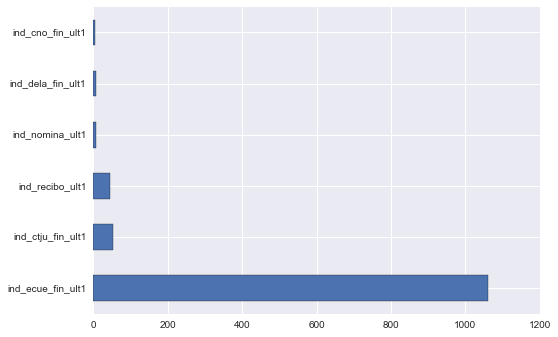

In [64]:
#Bar graph showing the products, a lot of customers added e-accounts (second bar), 
#part 1 tries to show the smaller values
pd.value_counts(final_df[final_df.added_products!= 'ind_cco_fin_ult1'].added_products).plot(kind='barh')

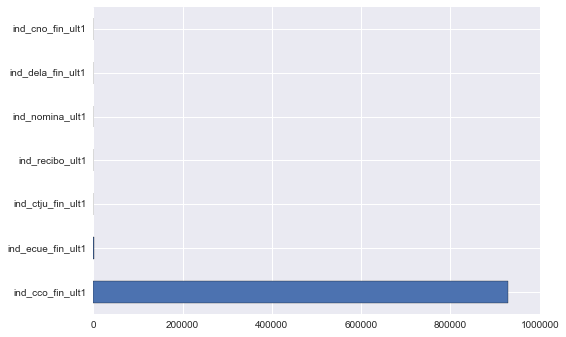

In [65]:
#Bar graph showing the products, a lot of customers added e-accounts (second bar), 
#part 2 shows the largest value
pd.value_counts(final_df.added_products).plot(kind="barh")

In [66]:
#final_df.to_csv("submission.csv", index=False)